In [1]:
import pandas as pd
import random
import numpy as np
from matplotlib import pylab as plt
import scipy.stats
import copy
from scipy.sparse import linalg as LA

In [2]:
path_data = "../data/"
file_ind2007 = "2007-acs-ind-codes.csv"
file_ind2010 = "2012-acs-ind-codes.csv"
df = pd.read_csv(path_data + "cps_00011_ind_geo.csv")
df_ind07 = pd.read_csv(path_data + file_ind2007)
df_ind10 = pd.read_csv(path_data + file_ind2010)

In [3]:
dict_code_ind07 = dict(zip(df_ind07["2007 Census Code"], df_ind07["Industry 2007 Description"]))
dict_code_ind10 = dict(zip(df_ind10["2012 Census Code"], df_ind10["Industry 2012 Description"]))
dict_code_ind_both = copy.copy(dict_code_ind10)

for key07 in dict_code_ind07.keys():
    if key07 not in dict_code_ind_both.keys():
        dict_code_ind_both[key07] = dict_code_ind07[key07]
            

In [4]:
df = df[df["YEAR"].isin([i for i in range(2010, 2020)])]

In [5]:
df.YEAR.unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

In [7]:
df_ind07

,broad,Industry 2007 Description,Unnamed: 2,2007 Census Code,2007 NAICS Code,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Agriculture, Forestry, Fishing, and Hunting, a...",NaN,NaN,0170-0490,111-213,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,"Agriculture, Forestry, Fishing, and Hunting",NaN,0170-0290,111-115,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
343,NaN,U. S. Coast Guard,NaN,9780,928110,NaN,NaN,NaN,NaN
344,NaN,"U. S. Armed Forces, Branch not specified",NaN,9790,928110,NaN,NaN,NaN,NaN
345,NaN,Military Reserves or National Guard,NaN,9870,928110,NaN,NaN,NaN,NaN
346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
df.head()

,YEAR,SERIAL,MONTH,CPSID,ASECFLAG,HFLAG,ASECWTH,MISH,STATEFIP,ASECOVERH,...,OCC2010,IND1990,IND,ASECOVERP,OCCLY,INDLY,IND90LY,OCC10LY,QOCCLY,MIGSTA1
2039037,2010,1,3,20091200101400,1,NaN,485.99,4,23,0,...,9999,0,0,0,0,0,0,9999,0,99
2039038,2010,2,3,20091201328700,1,NaN,531.71,4,23,0,...,9999,0,0,0,6050,170,10,6050,0,99
2039039,2010,3,3,20091202862200,1,NaN,474.40,4,23,0,...,9999,0,0,0,0,0,0,9999,0,99
2039040,2010,3,3,20091202862200,1,NaN,474.40,4,23,0,...,9999,0,0,0,0,0,0,9999,0,99
2039041,2010,4,3,20091201328800,1,NaN,486.65,4,23,0,...,4250,20,7770,0,4250,7770,20,4250,0,99


In [64]:
df = df[df["ASECWT"].notna()]
# remove CPSIDP unless they are part of the asec over sample
df = df[(df["CPSIDP"] != 0) | (df["ASECOVERP"] == 1)] 
# People in labor force
df = df[df.LABFORCE == 2]

In [65]:
print("Workforce estimation (millions) ", df["ASECWT"].loc[df["YEAR"] == 2019].sum()/1e6)

Workforce estimation (millions)  163.00103038999998


In [66]:
# get list of all codes 
list_industries = [str(i) for i in (df["IND"].unique())]
# make them strings and add 0 at begining where needed
for i in range(len(list_industries)):
    if len(list_industries[i]) == 3:
        list_industries[i] = "0" + list_industries[i]
# remove 0 and sort
list_industries.remove("0")
list_industries.sort()

In [67]:
list_industries;

In [68]:
dict_ind_avemp = {}
for ind in list_industries:
    emp = df["ASECWT"].loc[(df["IND"] == int(ind)) & (df["EMPSTAT"].isin([10, 12]))].sum()
    # average is divided by 10
    emp_average = emp/10
    dict_ind_avemp[ind] = emp_average

In [69]:
df_industries = pd.DataFrame()
df_industries["Code"] = list_industries
df_industries["Label"] = df_industries["Code"].map(dict_code_ind_both)
df_industries["EMP_10_19_MEAN"] = df_industries["Code"].map(dict_ind_avemp)

In [12]:
df_industries.to_csv(path_data + "industries_acs_10_19_emp.csv")

In [ ]:
df_industries.to_csv(path_data + "industries_acs_10_19_emp_broad.csv")

In [70]:
dict_indcode_index = {}
for i, ind in enumerate(list_industries):
    dict_indcode_index[ind] = i

In [71]:
np.sum(list(dict_ind_avemp.values()))/1e6

161.364091751

In [72]:
9890 in df["IND"].loc[(df["EMPSTAT"].isin([10, 12]))].unique()

False

In [85]:
A_omn.sum()

NameError: name 'A_omn' is not defined

### Make industry mobility network

In [73]:
df_nonan = df[(df["ASECWT"].notna()) & (df["IND"] != 9999) & (df["INDLY"] != 9999)] 

In [74]:
df_nonan["ChangeInd"] = df_nonan["IND"] != df_nonan["INDLY"]
df_nonan["ChangeIndWT"] = df_nonan["ChangeInd"] * df_nonan["ASECWT"]

In [75]:
dict_indcode_index;

In [76]:
def ind_mob_asec(df, dict_code_index):
    """Makes occupational mobiltiy network from ASEC
    """
    # keep track of occupations not included
    ind_notinlist = set([0])
    # make empty matrix
    n = len(dict_code_index)
    A = np.zeros([n, n])
    # fill whenver there is a transition
    for index, row in df.iterrows():
        ind_i = str(row["INDLY"]) 
        ind_j = str(row["IND"])
        if ind_i != ind_j:
            if len(ind_i) == 3:
                ind_i = "0" + ind_i
            if len(ind_j) == 3:
                ind_j = "0" + ind_j
            if ind_i in list_industries and ind_j in list_industries:
                i, j = dict_code_index[ind_i], dict_code_index[ind_j]
                A[i, j] += row["ASECWT"] # consider ASEC weights
            elif ind_i not in list_industries:
                if ind_i not in ind_notinlist:
                    ind_notinlist.add(ind_i)
            elif ind_j not in list_industries:
                if ind_j not in ind_notinlist:
                    ind_notinlist.add(ind_j)
    return A, ind_notinlist

In [77]:
T_ind, ind_notinc = ind_mob_asec(df_nonan , dict_indcode_index)

In [78]:
T_ind = T_ind/10 # normalize for the 10 years

In [79]:
np.savetxt(path_data + "asec_ind_10_19_mean.csv", T_ind, delimiter=",")

## Make industry geography matrix

In [82]:
df.columns

Index(['YEAR', 'SERIAL', 'MONTH', 'CPSID', 'ASECFLAG', 'HFLAG', 'ASECWTH',
       'MISH', 'STATEFIP', 'ASECOVERH', 'PERNUM', 'CPSIDP', 'ASECWT', 'AGE',
       'SEX', 'RACE', 'HISPAN', 'EMPSTAT', 'LABFORCE', 'OCC', 'OCC2010',
       'IND1990', 'IND', 'ASECOVERP', 'OCCLY', 'INDLY', 'IND90LY', 'OCC10LY',
       'QOCCLY', 'MIGSTA1'],
      dtype='object')

In [83]:
states = list(df["STATEFIP"].unique())
states.sort()

In [84]:
n_industries = len(list_industries)
n_states = len(states)

In [44]:
A_ind_st = np.zeros([n_industries, n_states])
for i, ind in enumerate(list_industries):
    for j, st in enumerate(states):
        A_ind_st[i, j] += df["ASECWT"].loc[(df["IND"] == int(ind)) & \
                                    (df["EMPSTAT"].isin([10, 12])) & \
                                   (df["STATEFIP"] == int(st))].sum()
# normalize for the 10 years
A_ind_st = A_ind_st/10

In [45]:
np.savetxt(path_data + "asec_ind_state_10_19_mean.csv", A_ind_st, delimiter=",")

In [ ]:
df_states = pd.DataFrame()
df_states["state_code"] = states


In [41]:
len(states)

51

In [40]:
states

[1,
 2,
 4,
 5,
 6,
 8,
 9,
 10,
 11,
 12,
 13,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 53,
 54,
 55,
 56]

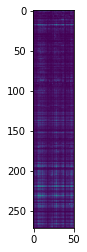

In [28]:
plt.imshow(A_ind_stsqrt(A_ind_st))
plt.show()

In [37]:
A_ind_st

array([[4.29285400e+03, 1.12361500e+03, 3.11616400e+03, ...,
        2.36035553e+05, 6.52500000e+02, 6.09399600e+03],
       [4.00434700e+03, 2.10462100e+03, 4.83796600e+03, ...,
        5.39117650e+04, 5.41696000e+02, 1.23538400e+03],
       [4.81180000e+02, 2.00039000e+02, 1.45130000e+02, ...,
        9.22292600e+03, 7.96768000e+02, 1.10994000e+02],
       ...,
       [2.81935500e+03, 2.05670000e+03, 1.87785500e+03, ...,
        5.69070910e+04, 4.23696300e+03, 4.17569700e+03],
       [2.90318400e+03, 2.88744500e+03, 2.89800900e+03, ...,
        8.43811550e+04, 5.46999700e+03, 1.83791930e+04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
dict_ind_avemp = {}
for ind in list_industries:
    emp = df["ASECWT"].loc[(df["IND"] == int(ind)) & (df["EMPSTAT"].isin([10, 12]))].sum()
    # average is divided by 10
    emp_average = emp/10
    dict_ind_avemp[ind] = emp_average

In [57]:
ind_notinc;

In [14]:

print("People that changed occupaiton (millions) ", df["ChangeOccWT"].sum()/1e6)
print("Percentage of workforce that switched occupation in a year ", df["ChangeOccWT"].sum()/df["ASECWT"].sum())

Workforce estimation (millions)  213.27099866999998


KeyError: 'ChangeOccWT'

In [8]:
(df_asec_2019["CPSIDP"] != 0) | (df_asec_2019["ASECOVERP"] == 1)

In [9]:
df["IND"].unique()

array([ 850,  581,    0,  612,  651,  732,  641,  842,  640,  880,  831,
        710,   60,  550,  410,  832,  820,  552,  711,  351,  910,  541,
        812,  921,  890,  591,  601,  521,  663,  700,  633,  722,  761,
        882,  840,  862,  412,  901,  762,  741,  152,  450,  623,  540,
        360,  580,  672,  661,  841,  772,  620,  421,  282,  622,  791,
        731,  621,  221,  821,  402,  171,  440,  642,  331,  701,  320,
        611,  630,  500,  871,  632,  800,  180,  781,  631,  600,  242,
        671,  161,  342,  851,  172,  863,  562,  740,  151,  810,  712,
        892,  140,  530,  682,  652,  160,  870,  650,  893,  702,  932,
        142,  150,  660,   32,  872,  231,  931,   11,  441,  230,  891,
         12,  502,  241,  930,  532,  751,  801,   10,  162,  590,  512,
        471,  582,  211,  212,   20,  900,  881,  400,  922,  192,  341,
        531,  860,  352,  760,  770,  102,  510,  111,  610,  830,  470,
        371,  280,   30,  411,  592,  121,  771,  5